# Proyecto: “Lasso y Elastic Net”

Reconocimiento de patrones

***Estudiante: Cielo Aholiva Higuera Gutiérrez***

## 🎯 Objetivo del Proyecto

El objetivo principal de este proyecto es **estudiar, aplicar y comparar modelos de regresión penalizada**, específicamente **Lasso** y **Elastic Net**, utilizando el conjunto de datos de precios de viviendas en California. Además, se busca **evaluar su desempeño** en comparación con un modelo adicional, **Support Vector Regression (SVR)**, empleando métricas estándar de regresión como MAE, RMSE y R².

Mediante este análisis se pretende:

- Comprender el funcionamiento y ventajas de las regresiones penalizadas en contextos con múltiples variables predictoras.
- Evaluar su capacidad de generalización sobre datos reales.
- Comparar sus resultados con un modelo no lineal (SVR), resaltando fortalezas y debilidades de cada enfoque.

# Librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVR
from sklearn.linear_model import Lasso, ElasticNet

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing

# Preprocesing Data

## Data Set Characteristics

- **Number of Instances:** 20,640  
- **Number of Attributes:** 8 numeric, predictive attributes and 1 target  
- **Missing Attribute Values:** None  

## Housing features

| Attribute     | Description                                     |
|---------------|-------------------------------------------------|
| `MedInc`      | Median income in block group                   |
| `HouseAge`    | Median house age in block group                |
| `AveRooms`    | Average number of rooms per household          |
| `AveBedrms`   | Average number of bedrooms per household       |
| `Population`  | Block group population                         |
| `AveOccup`    | Average number of household members            |
| `Latitude`    | Block group latitude                           |
| `Longitude`   | Block group longitude                          |

## Target Variable

- Median house value for California districts, expressed in **hundreds of thousands of dollars** ($100,000).

# Datos

In [2]:
data = fetch_california_housing()
pd.DataFrame(data.data, columns=data.feature_names)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


from matplotlib import pyplot as plt
_df_0['MedInc'].plot(kind='hist', bins=20, title='MedInc')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['HouseAge'].plot(kind='hist', bins=20, title='HouseAge')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['AveRooms'].plot(kind='hist', bins=20, title='AveRooms')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['AveBedrms'].plot(kind='hist', bins=20, title='AveBedrms')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='MedInc', y='HouseAge', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='HouseAge', y='AveRooms', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='AveRooms', y='AveBedrms', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='AveBedrms', y='Population', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['MedInc'].plot(kind='line', figsize=(8, 4), title='MedInc')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['HouseAge'].plot(kind='line', figsize=(8, 4), title='HouseAge')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['AveRooms'].plot(kind='line', figsize=(8, 4), title='AveRooms')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['AveBedrms'].plot(kind='line', figsize=(8, 4), title='AveBedrms')
plt.gca().spines[['top', 'right']].set_visible(False)

In [6]:
pd.DataFrame(data.target, columns=["MedHouseVal"])

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


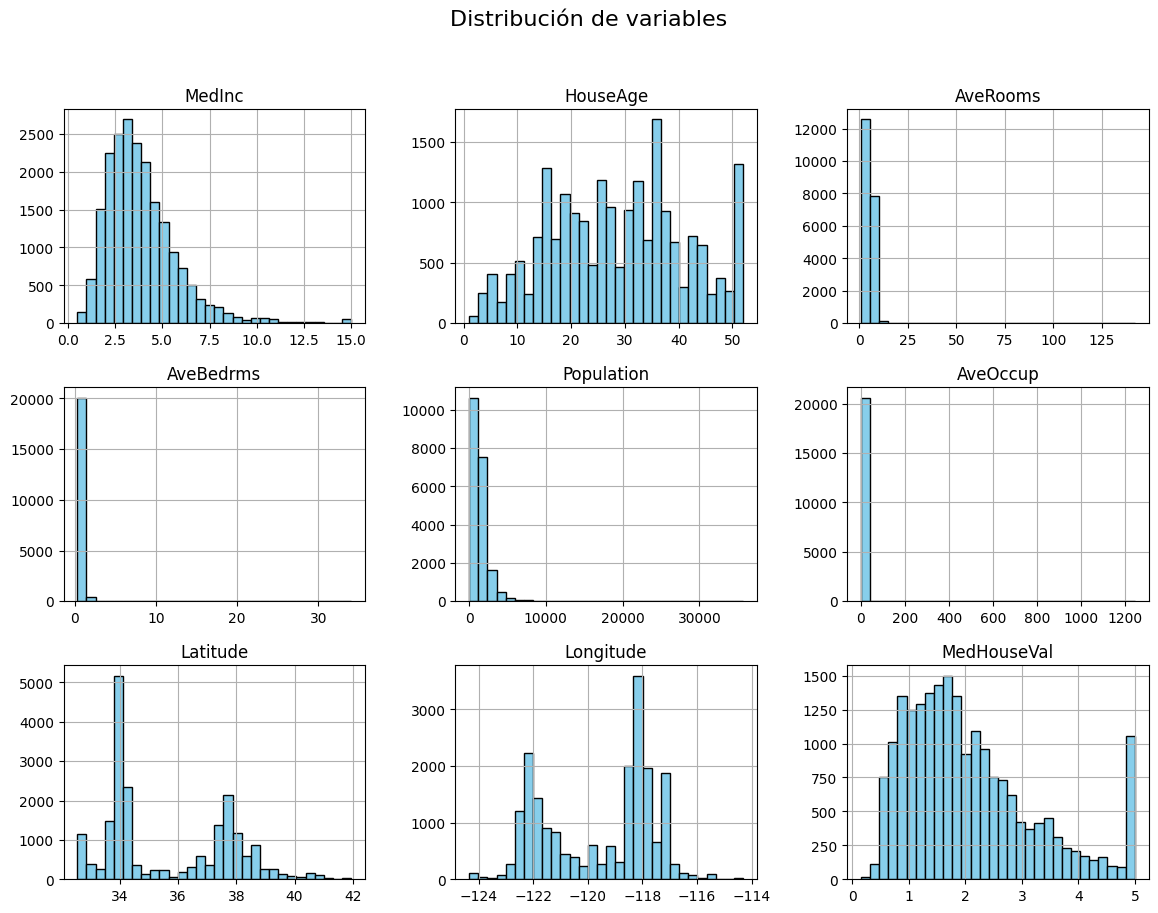

In [17]:
housing_df.hist(figsize=(14, 10), bins=30, color='skyblue', edgecolor='black') # Use the defined variable
plt.suptitle("Distribución de variables", fontsize=16)
plt.show()

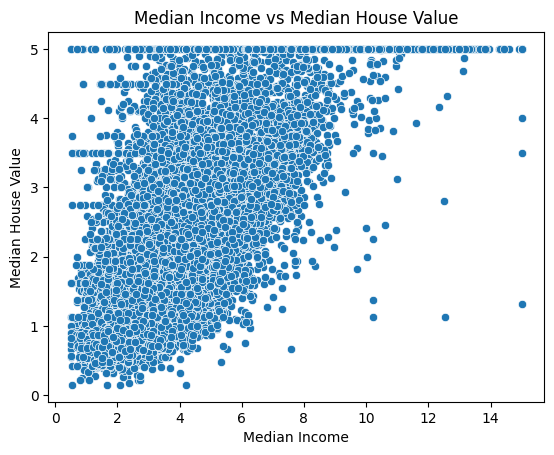

In [14]:
housing_df = pd.DataFrame(data.data, columns=data.feature_names)
housing_df['MedHouseVal'] = data.target

sns.scatterplot(data=housing_df, x='MedInc', y='MedHouseVal')
plt.title('Median Income vs Median House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

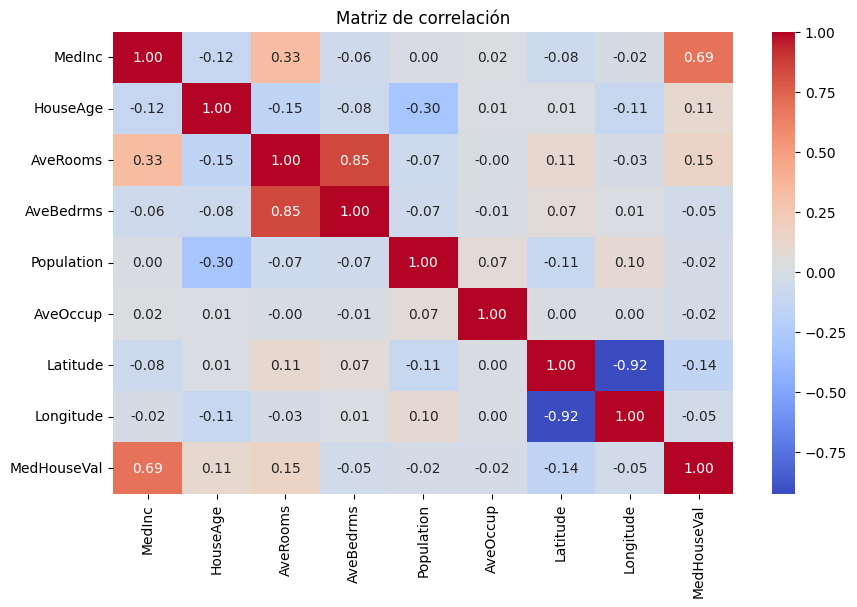

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(housing_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación")
plt.show()


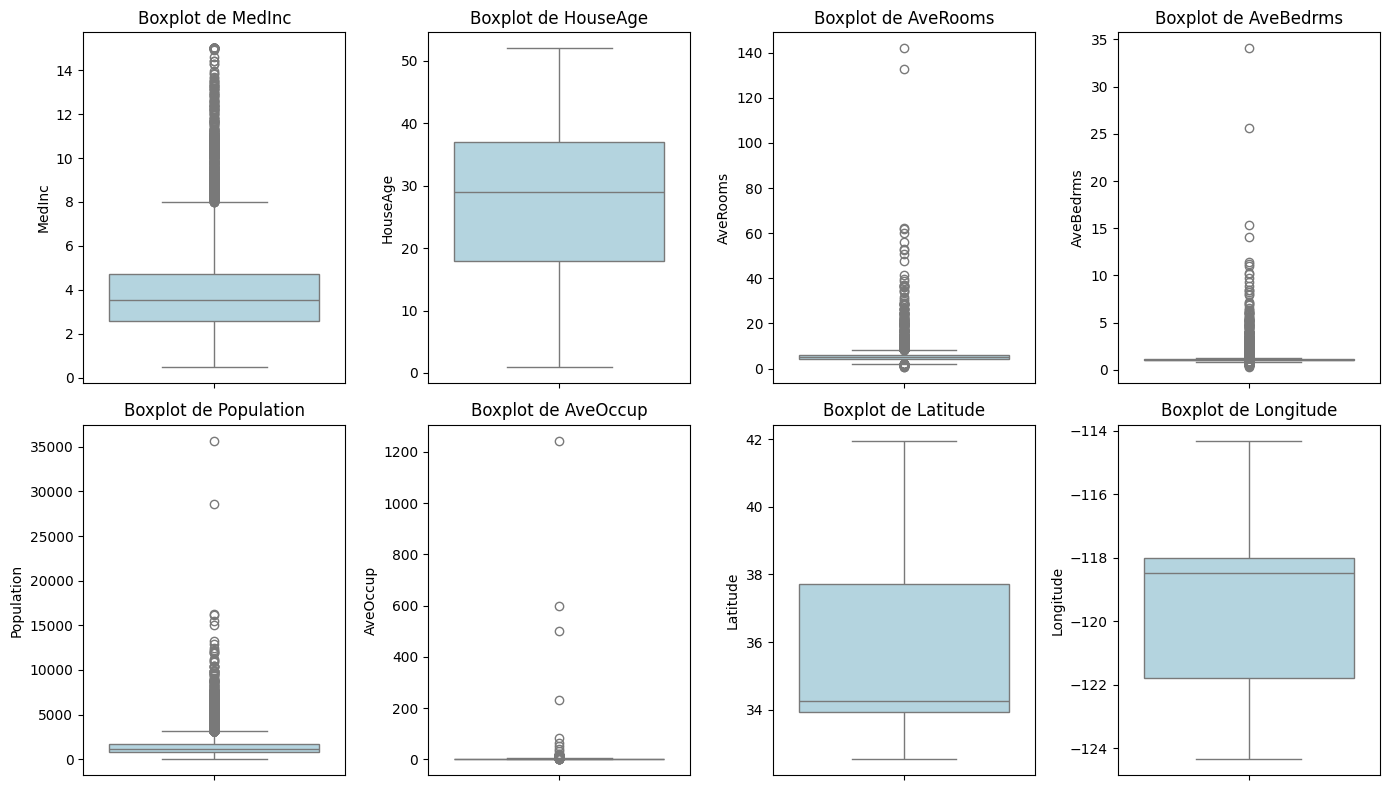

In [19]:
plt.figure(figsize=(14, 8))

for i, col in enumerate(housing_df.columns[:-1], 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=housing_df[col], color='lightblue')
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

# Selección de características

In [ ]:
X = data.data
y = data.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
svr = SVR(kernel='rbf', C=10, epsilon=0.1)
lasso = Lasso(alpha=0.1)
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)

# Entrenamiento y evaluación

In [ ]:
def plot_metrics(y_true, y_pred, model='Modelo'):
   # Calcular métricas
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

    metrics = {'MAE': mae, 'RMSE': rmse, 'R²': r2}

    # Plot
    plt.figure(figsize=(6, 4))
    plt.bar(metrics.keys(), metrics.values(), color=['steelblue', 'orange', 'green'])
    plt.title(f'Métricas de Evaluación - {model}')
    plt.ylabel('Valor')
    for i, (k, v) in enumerate(metrics.items()):
        plt.text(i, v + 0.01, f"{v:.3f}", ha='center', va='bottom')
    plt.ylim(0, max(metrics.values()) * 1.2)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


In [ ]:
def plot_dispersion(y_true, y_pred, y, model):
  # Gráfica
  plt.figure(figsize=(6,6))
  plt.scatter(y_test, y_pred, alpha=0.3)
  plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
  plt.xlabel("Valor Real")
  plt.ylabel("Predicción")
  plt.title(f"Predicción vs Valor Real - {model}")
  plt.grid(True)
  plt.show()

In [ ]:
def plot_sorted_predictions(y_test, y_pred, model_name="Modelo"):
    sorted_idx = np.argsort(y_test)
    plt.figure(figsize=(10,4))
    plt.plot(y_test[sorted_idx], label='Valor Real', color='black')
    plt.plot(y_pred[sorted_idx], label='Predicción', color='orange', linestyle='--')
    plt.title(f"{model_name}: Valores reales vs predicciones (ordenadas)")
    plt.xlabel("Índice ordenado")
    plt.ylabel("Valor")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [ ]:
def plot_residuals(y_test, y_pred, model_name="Modelo"):
    residuals = y_test - y_pred
    plt.figure(figsize=(6,4))
    plt.scatter(y_pred, residuals, alpha=0.3, color='purple', edgecolor='k')
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel("Predicción")
    plt.ylabel("Error (Residual)")
    plt.title(f"{model_name}: Gráfico de Residuos")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## Model: SVR

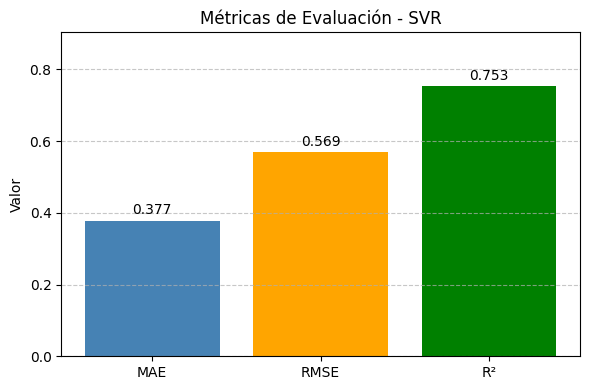

In [ ]:
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
plot_metrics(y_test, y_pred, "SVR")

### Gráfico de disperción

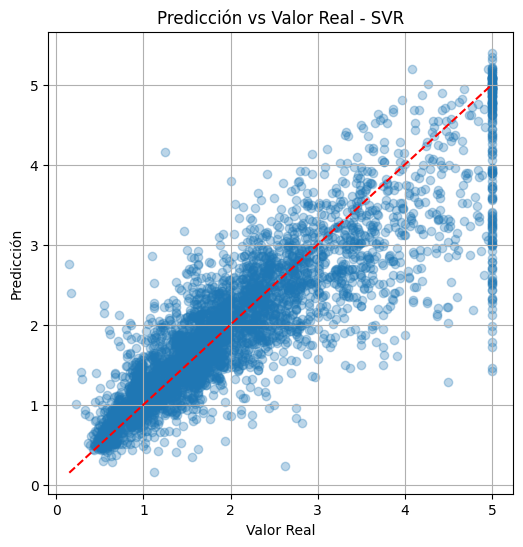

In [ ]:
plot_dispersion(y_test, y_pred, y, "SVR")

### Predicciones organizadas

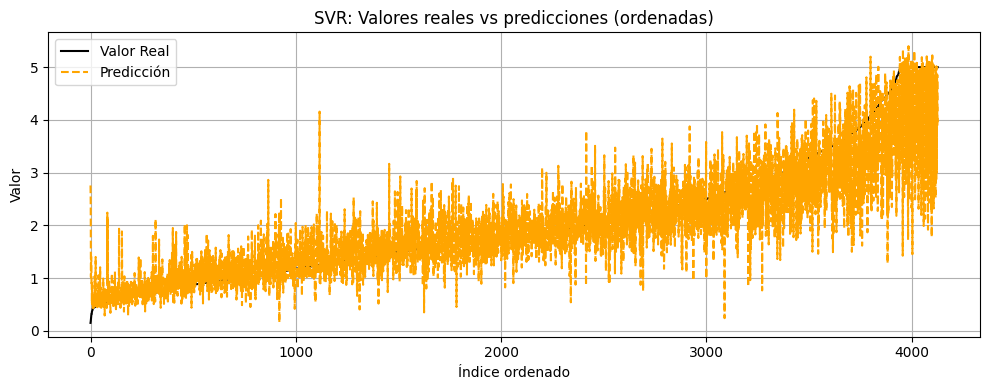

In [ ]:
plot_sorted_predictions(y_test, y_pred, model_name="SVR")

### Errores de prediccion (Residuales)

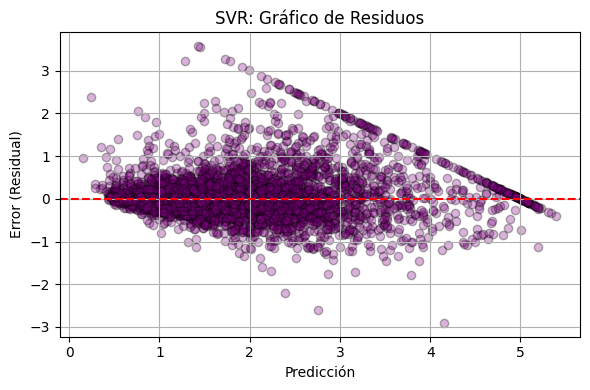

In [ ]:
plot_residuals(y_test, y_pred, model_name="SVR")

## Model: Lasso

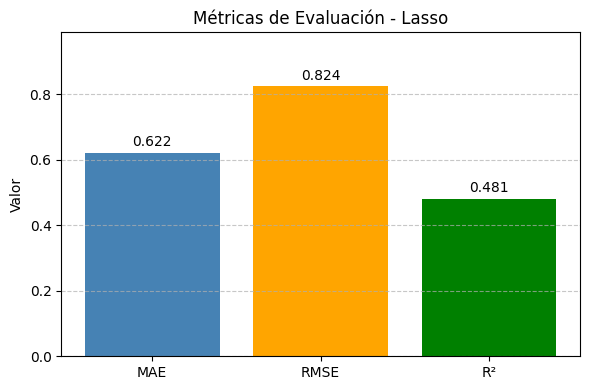

In [ ]:
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
plot_metrics(y_test, y_pred, "Lasso")

### Gráfico de disperción

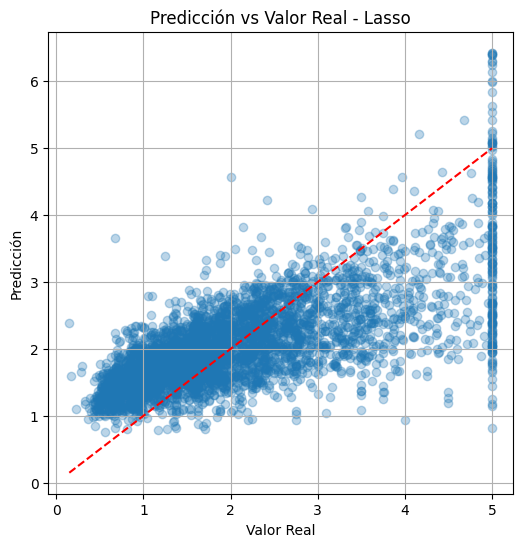

In [ ]:
plot_dispersion(y_test, y_pred, y, "Lasso")

### Predicciones organizadas

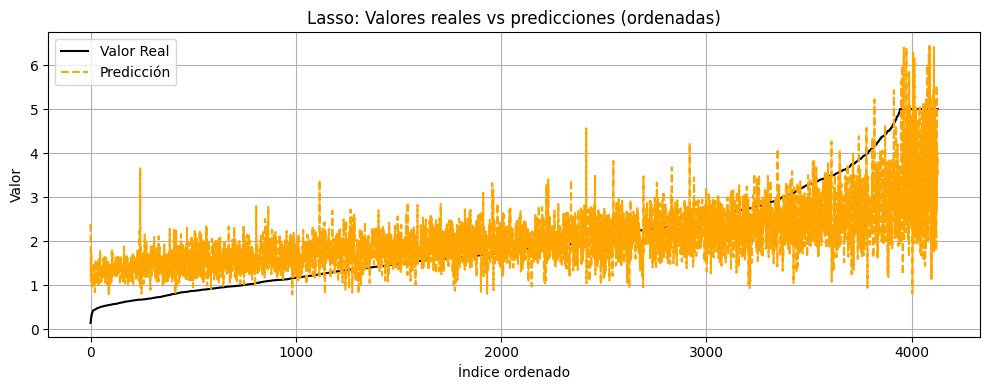

In [ ]:
plot_sorted_predictions(y_test, y_pred, model_name="Lasso")

### Errores de prediccion (Residuales)

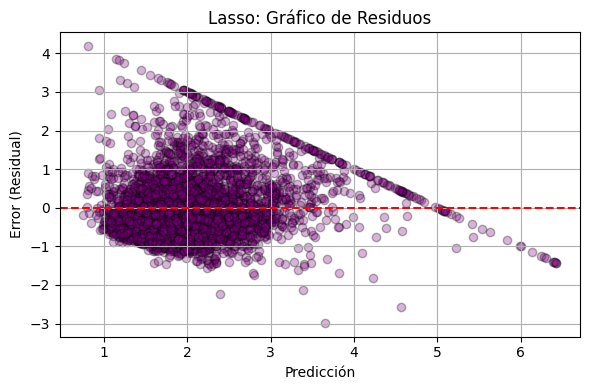

In [ ]:
plot_residuals(y_test, y_pred, model_name="Lasso")

##  Model: Elastic Net

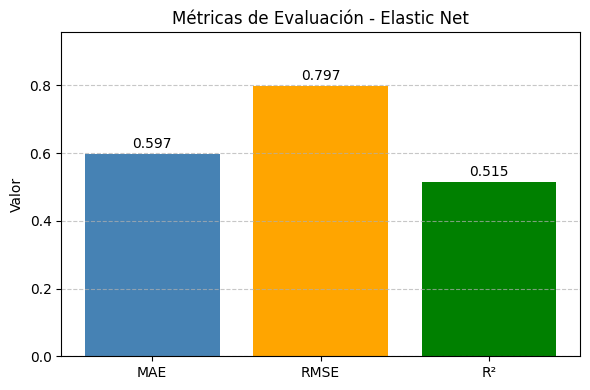

In [ ]:
elastic_net.fit(X_train, y_train)
y_pred = elastic_net.predict(X_test)
plot_metrics(y_test, y_pred, "Elastic Net")

### Gráfico de disperción

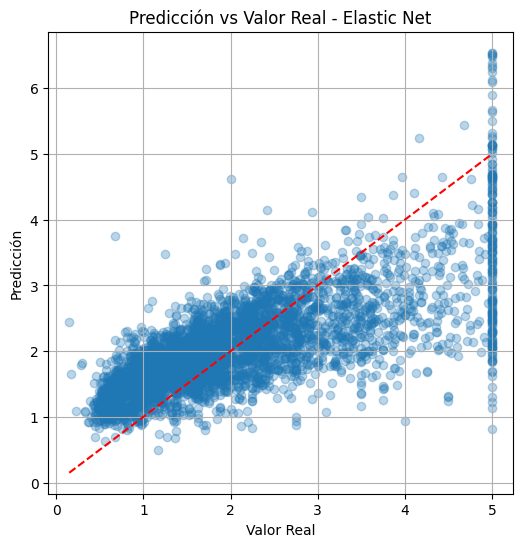

In [ ]:
plot_dispersion(y_test, y_pred, y, "Elastic Net")

### Predicciones organizadas

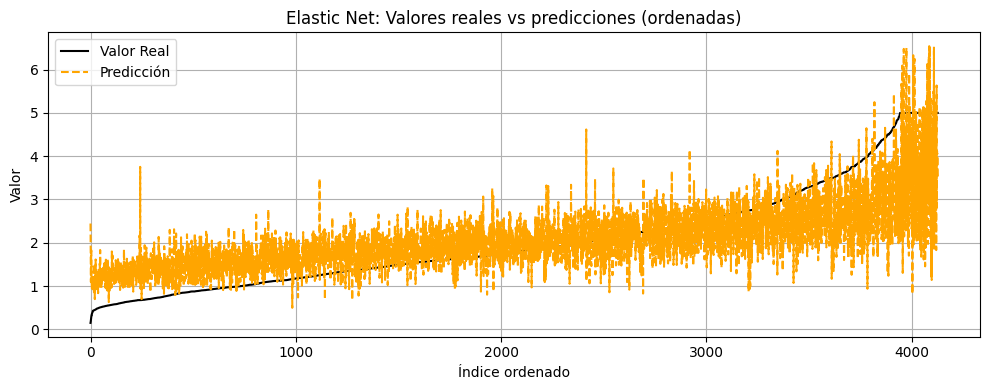

In [ ]:
plot_sorted_predictions(y_test, y_pred, model_name="Elastic Net")

### Errores de prediccion (Residuales)

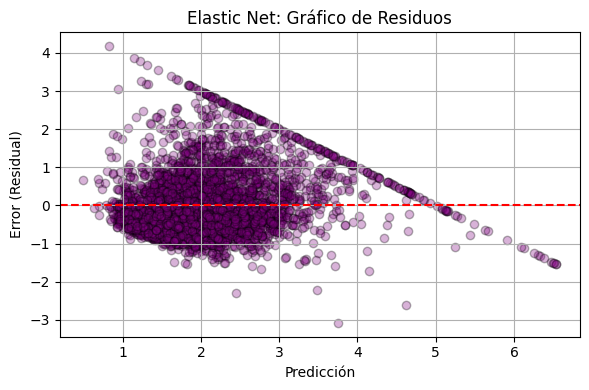

In [ ]:
plot_residuals(y_test, y_pred, model_name="Elastic Net")

## 📊 Discusión y Conclusiones

En este proyecto se compararon tres modelos de regresión aplicados al conjunto de datos **California Housing**: **SVR (Support Vector Regression)**, **Lasso** y **Elastic Net**. A continuación se presentan los resultados de evaluación obtenidos:

| Modelo       | MAE   | RMSE  | R²     |
|--------------|-------|-------|--------|
| SVR          | 0.377 | 0.569 | 0.753  |
| Lasso        | 0.622 | 0.824 | 0.481  |
| Elastic Net  | 0.597 | 0.797 | 0.515  |

### 🔍 Discusión

- **SVR** fue el modelo con mejor desempeño general. Obtuvo el menor **MAE** y **RMSE**, lo que indica que sus predicciones estuvieron, en promedio, más cerca de los valores reales. Además, su **R² de 0.753** sugiere que logra explicar una proporción significativa de la varianza en los datos.

- **Lasso** y **Elastic Net**, aunque útiles como modelos lineales penalizados, mostraron una capacidad predictiva notablemente menor. Ambos modelos tienen errores promedio (MAE y RMSE) más altos y un coeficiente de determinación (**R²**) considerablemente más bajo, lo cual indica que capturan menos relación entre las variables predictoras y la variable objetivo.

- Entre Lasso y Elastic Net, **Elastic Net** obtuvo métricas ligeramente mejores. Esto era esperable, ya que Elastic Net combina las penalizaciones de Lasso y Ridge, lo que le permite un mejor balance entre selección de variables y regularización.


### ✅ Conclusiones

- **Support Vector Regression (SVR)** es claramente la mejor opción entre los tres modelos evaluados para este conjunto de datos, ya que proporciona mejores predicciones y mayor capacidad de generalización.

- Aunque **Lasso** y **Elastic Net** son técnicas útiles para la selección de variables y reducción de complejidad, en este caso no fueron competitivas frente al enfoque no lineal de SVR.

- Para futuros experimentos, se podría explorar la optimización de hiperparámetros en SVR y el uso de modelos aún más complejos como **Random Forests**, **Gradient Boosting** o redes neuronales para mejorar la capacidad predictiva.
